In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


file = pd.read_csv("Wholesale customers data.csv")
file = file.drop(['Region','Channel'],axis=1)
random.seed(198)
kmeans = KMeans(n_clusters=5,random_state=random.randint(0,90)) # You want cluster the passenger records into 2: Survived or Not survived
X=file
kmea = kmeans.fit(X)
# Getting the cluster labels
labels = kmea.predict(X)
clust = labels
print(file)


     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
5     9413   8259     5126     666              1795        1451
6    12126   3199     6975     480              3140         545
7     7579   4956     9426    1669              3321        2566
8     5963   3648     6192     425              1716         750
9     6006  11093    18881    1159              7425        2098
10    3366   5403    12974    4400              5977        1744
11   13146   1124     4523    1420               549         497
12   31714  12319    11757     287              3881        2931
13   21217   6208    14982    3095              6707         602
14   24653   9465    1209

In [2]:
#Number of elements in clusters
r=labels.tolist()
print('1 - ',r.count(0),',2 - ',r.count(1),',3 - ',r.count(2),',4 - ',r.count(3),',5 - ',r.count(4))

1 -  227 ,2 -  24 ,3 -  5 ,4 -  71 ,5 -  113


In [3]:
# Centroid values
centroids = kmea.cluster_centers_
print(centroids)


[[ 5655.81938326  3567.79295154  4513.03964758  2386.52863436
   1437.55947137  1005.030837  ]
 [48777.375       6607.375       6197.79166667  9462.79166667
    932.125       4435.33333333]
 [25603.         43460.6        61472.2         2636.
  29974.2         2708.8       ]
 [ 5207.83098592 13191.02816901 20321.71830986  1674.02816901
   9036.38028169  1937.94366197]
 [20600.28318584  3787.83185841  5089.84070796  3989.07079646
   1130.14159292  1639.07079646]]


In [4]:
#For calculating within SSE and Total SSE
sse=[]
for j in range(5):
    su=0
    for i in range(len(file)):
        if clust[i]==j:
            su=su+pow(np.linalg.norm((file.values[i]-centroids[j])),2)
    sse.append(su)
print('SSE within Clusture :', sse)
print("Total SSE : ",sum(sse))

SSE within Clusture : [10804478228.801756, 16226867469.125004, 5682449097.599999, 11008166106.732395, 9394958498.477877]
Total SSE :  53116919400.73703


In [5]:
#Heterogeneity
for i in range(5):
    for j in range(i,4):
        su=su+pow(np.linalg.norm((centroids[i]-centroids[j+1])),2)
print("Between SSE : ",su)

        

Between SSE :  36670043624.823746


In [6]:
#100 Times for k=2 to 20
def sse(k,centroids,clust):
    sse=[]
    for j in range(k):
        su=0
        for i in range(len(file)):
            if clust[i]==j:
                su=su+pow(np.linalg.norm((file.values[i]-centroids[j])),2)
        sse.append(su)
    return sum(sse)


tsse = []   
for k in range(2,20,1):
    random.seed(12)
    kmea=KMeans(n_clusters=k,random_state=random.randint(0,90),max_iter=100)
    re = kmea.fit(file)
    lable = re.predict(file)
    centroids = re.cluster_centers_
    tsse.append(sse(k,centroids,lable))

print(tsse)

[113217528520.90999, 80332413843.01639, 65106848391.0891, 52928148942.5761, 47436360779.964294, 41908265463.844826, 37682777856.41406, 33009179902.191788, 30404410396.369602, 28517724616.403736, 26164604277.03693, 24443582949.95494, 23523598267.03381, 21637831576.812023, 19946583457.672916, 18804394131.691227, 17902991509.01177, 16557580159.090225]


In [7]:
file.values[i]

array([22615,  5410,  7198,  3915,  1777,  5185], dtype=int64)

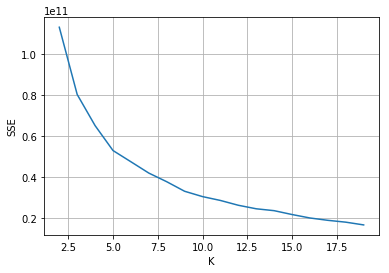

In [8]:

import matplotlib.pyplot as plt
plt.plot([k for k in range(2,20)],tsse)
plt.ylabel('SSE')


plt.xlabel('K')
plt.grid(True)
plt.show()


In [9]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
print(random.randint(0,90))

34


Suitable number of cluster may 5.